In [2]:
import geopandas as gpd
from shapely import wkt
import matplotlib.pyplot as plt
import pandas as pd 
from shapely.ops import polygonize, split
import topojson as tp

def import_csv_w_wkt_to_gdf(path,crs,geometry_col='geometry'):
    '''
    Import a csv file with WKT geometry column into a GeoDataFrame

    Last modified: 12/09/2020. By: Nikola

    '''

    df = pd.read_csv(path)
    gdf = gpd.GeoDataFrame(df, 
                        geometry=df[geometry_col].apply(wkt.loads),
                        crs=crs)
    return(gdf)

In [4]:
df = import_csv_w_wkt_to_gdf(r'/media/nmd/Krzrzrz/data-eubucco/France/Paris, 19e arrondissement/Paris, 19e arrondissement_attrib.csv',3035)

In [5]:
df = df.drop(columns=['source_file','Unnamed: 0','type','floors'])

In [6]:
df = df.dropna()

In [7]:
df['age']=[int(x[0:4]) for x in df.age]

In [8]:
df.reset_index(drop=True)

,id,height,type_source,age,geometry
0,BATIMENT0000000246051579,7.6,Résidentiel,2003,"POLYGON ((3764683.760 2892012.111, 3764671.338..."
1,BATIMENT0000000246052164,6.2,Résidentiel,1980,"POLYGON ((3764557.950 2892209.038, 3764553.509..."
2,BATIMENT0000000246050235,7.9,Résidentiel,1935,"POLYGON ((3764578.632 2892192.980, 3764577.400..."
3,BATIMENT0000000246050239,7.9,Résidentiel,1905,"POLYGON ((3764572.585 2892170.241, 3764564.270..."
4,BATIMENT0000000246051796,0.0,Annexe,1970,"POLYGON ((3764815.342 2891904.594, 3764815.062..."
...,...,...,...,...,...
3708,BATIMENT0000002011665751,12.9,Résidentiel,2016,"POLYGON ((3763701.227 2892491.402, 3763710.179..."
3709,BATIMENT0000002011665753,13.3,Résidentiel,2016,"POLYGON ((3763628.707 2892069.150, 3763628.376..."
3710,BATIMENT0000002011665754,32.2,Résidentiel,2015,"POLYGON ((3763101.162 2893857.649, 3763106.115..."
3711,BATIMENT0000002011665762,14.5,Résidentiel,2016,"POLYGON ((3763720.020 2892716.467, 3763718.400..."


In [9]:
topo = tp.Topology(df, prequantize=False)
df2 = topo.toposimplify(2).to_gdf()

/home/nmd/anaconda3/envs/mlup22/lib/python3.10/site-packages/topojson/core/extract.py:301: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  lst_idx = list(range(idx_ls, idx_ls + len(list(boundary))))
/home/nmd/anaconda3/envs/mlup22/lib/python3.10/site-packages/topojson/core/extract.py:301: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  lst_idx = list(range(idx_ls, idx_ls + len(list(boundary))))
/home/nmd/anaconda3/envs/mlup22/lib/python3.10/site-packages/topojson/core/extract.py:303: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geome

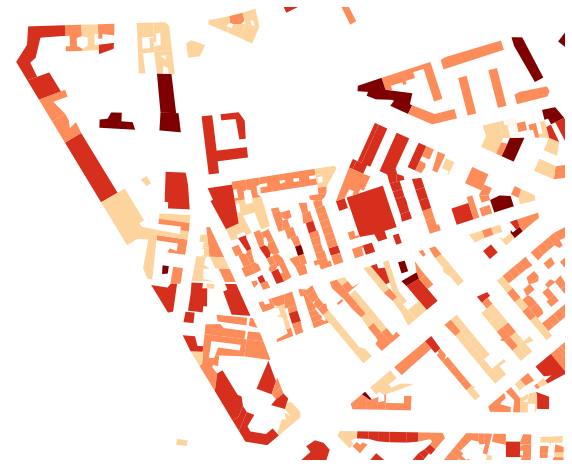

In [13]:
fig, ax = plt.subplots(figsize=(10,10))
df2.plot(ax=ax,column='age',#legend=True,
         cmap='OrRd',scheme='user_defined', 
                     classification_kwds={'bins':[1800,1900,1950,2000,2020]})
plt.xlim(3763525,3764030)
plt.ylim(2891755,2892165)
ax.set_axis_off()
plt.savefig('age.png',dpi=100)

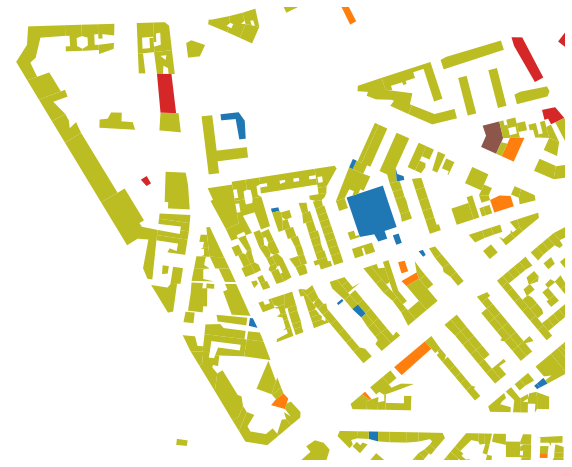

In [14]:
fig, ax = plt.subplots(figsize=(10,10))
df2.plot(ax=ax,column='type_source')#legend=True
plt.xlim(3763525,3764030)
plt.ylim(2891755,2892165)
ax.set_axis_off()
plt.savefig('type.png',dpi=100)

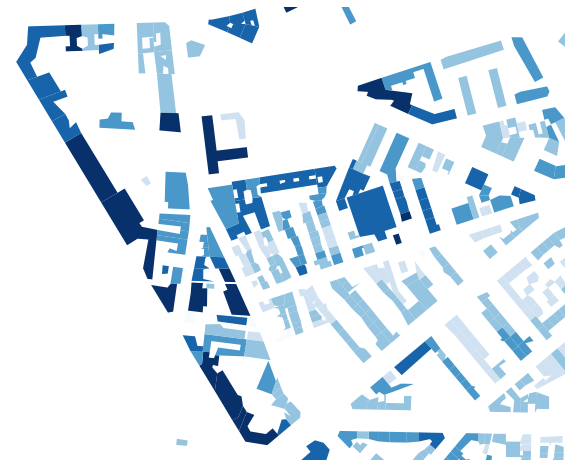

In [15]:
fig, ax = plt.subplots(figsize=(10,10))
df2.plot(ax=ax,column='height',#legend=True,
         cmap='Blues',scheme='user_defined', 
                     classification_kwds={'bins':[0,5,10,15,20]})
plt.xlim(3763525,3764030)
plt.ylim(2891755,2892165)
ax.set_axis_off()
plt.savefig('height.png',dpi=100)